# Example(Grouping Data)

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df=pd.read_csv('Data/Students/gradebook.csv')
df.head()

,name,gender,major,year,lessons,quizzes,tests,ave
0,Bob,M,CS,sophomore,64.50,64.50,65.000000,64.700000
1,Jim,M,MA,freshman,55.75,53.75,53.666667,54.316667
2,Kim,F,CS,sophomore,73.75,74.25,72.333333,73.333333
3,Sue,F,MA,sophomore,93.75,93.25,95.666667,94.366667
4,Tom,M,CS,freshman,83.75,86.25,83.333333,84.333333


In [44]:
df=df.set_index('name')

In [45]:
df.round(2)

,gender,major,year,lessons,quizzes,tests,ave
name,,,,,,,
Bob,M,CS,sophomore,64.50,64.50,65.00,64.70
Jim,M,MA,freshman,55.75,53.75,53.67,54.32
Kim,F,CS,sophomore,73.75,74.25,72.33,73.33
Sue,F,MA,sophomore,93.75,93.25,95.67,94.37
Tom,M,CS,freshman,83.75,86.25,83.33,84.33


 #### split into groups

In [46]:
gp = df.groupby('major')

In [47]:
gp.ngroups

2

In [48]:
gp.ngroup() #actual group

name
Bob    0
Jim    1
Kim    0
Sue    1
Tom    0
dtype: int64

In [49]:
gp.indices

{'CS': array([0, 2, 4], dtype=int64), 'MA': array([1, 3], dtype=int64)}

In [50]:
gp.get_group('MA')

,gender,major,year,lessons,quizzes,tests,ave
name,,,,,,,
Jim,M,MA,freshman,55.75,53.75,53.666667,54.316667
Sue,F,MA,sophomore,93.75,93.25,95.666667,94.366667


#### Apply to each group

In [51]:
gp.get_group('CS').mean()

lessons    74.000000
quizzes    75.000000
tests      73.555556
ave        74.122222
dtype: float64

In [52]:
gp.get_group('MA').mean()

lessons    74.750000
quizzes    73.500000
tests      74.666667
ave        74.341667
dtype: float64

In [53]:
gp.get_group('CS').describe()

,lessons,quizzes,tests,ave
count,3.000000,3.000000,3.000000,3.000000
mean,74.000000,75.000000,73.555556,74.122222
std,9.627435,10.894379,9.227575,9.840412
min,64.500000,64.500000,65.000000,64.700000
25%,69.125000,69.375000,68.666667,69.016667
50%,73.750000,74.250000,72.333333,73.333333
75%,78.750000,80.250000,77.833333,78.833333
max,83.750000,86.250000,83.333333,84.333333


#### Combine Results

In [54]:
gp.mean()

,lessons,quizzes,tests,ave
major,,,,
CS,74.00,75.0,73.555556,74.122222
MA,74.75,73.5,74.666667,74.341667


In [55]:
df.groupby('major').mean()

,lessons,quizzes,tests,ave
major,,,,
CS,74.00,75.0,73.555556,74.122222
MA,74.75,73.5,74.666667,74.341667


CS         AxesSubplot(0.1,0.15;0.363636x0.75)
MA    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

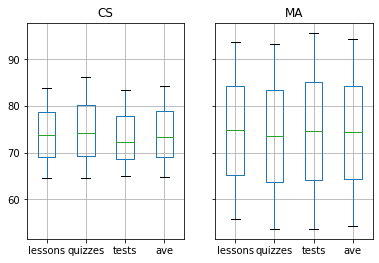

In [56]:
df.groupby('major').boxplot()

#### Hierarchical Grouping

In [57]:
df.groupby(['major','year']).groups

{('CS', 'freshman'): Index(['Tom'], dtype='object', name='name'),
 ('CS', 'sophomore'): Index(['Bob', 'Kim'], dtype='object', name='name'),
 ('MA', 'freshman'): Index(['Jim'], dtype='object', name='name'),
 ('MA', 'sophomore'): Index(['Sue'], dtype='object', name='name')}

In [58]:
df.groupby(['major','year']).mean().round(2)

lessons  quizzes  tests    ave
major year                                     
CS    freshman     83.75    86.25  83.33  84.33
      sophomore    69.12    69.38  68.67  69.02
MA    freshman     55.75    53.75  53.67  54.32
      sophomore    93.75    93.25  95.67  94.37

#### Transforming data by groups

In [59]:
df

,gender,major,year,lessons,quizzes,tests,ave
name,,,,,,,
Bob,M,CS,sophomore,64.50,64.50,65.000000,64.700000
Jim,M,MA,freshman,55.75,53.75,53.666667,54.316667
Kim,F,CS,sophomore,73.75,74.25,72.333333,73.333333
Sue,F,MA,sophomore,93.75,93.25,95.666667,94.366667
Tom,M,CS,freshman,83.75,86.25,83.333333,84.333333


In [60]:
#standarzation
def standardize(x):
    z = (x - x.mean())/x.std()
    return z
#taking data -mean then /standard deviation

In [61]:
standardize(df.ave).round(2)

name
Bob   -0.60
Jim   -1.26
Kim   -0.06
Sue    1.28
Tom    0.64
Name: ave, dtype: float64

In [62]:
df.ave.pipe(standardize) #readability

name
Bob   -0.602755
Jim   -1.260862
Kim   -0.055564
Sue    1.277552
Tom    0.641628
Name: ave, dtype: float64

In [63]:
df.ave.pipe(standardize).mean()

2.886579864025407e-16

In [64]:
df.ave.pipe(standardize).std()

1.0

In [65]:
df_s= df.groupby('major').transform(standardize)
df_s.round(2)

,lessons,quizzes,tests,ave
name,,,,
Bob,-0.99,-0.96,-0.93,-0.96
Jim,-0.71,-0.71,-0.71,-0.71
Kim,-0.03,-0.07,-0.13,-0.08
Sue,0.71,0.71,0.71,0.71
Tom,1.01,1.03,1.06,1.04


#### Sampling from Groups

In [66]:
def highest(x):
    y = x.rank(ascending = False)
    return y[y==1]

In [67]:
highest(df.ave)

name
Sue    1.0
Name: ave, dtype: float64

In [68]:
df.groupby('major')[['lessons','quizzes','tests','ave']].apply(highest)

,lessons,quizzes,tests,ave
name,,,,
Bob,NaN,NaN,NaN,NaN
Jim,NaN,NaN,NaN,NaN
Kim,NaN,NaN,NaN,NaN
Sue,1.0,1.0,1.0,1.0
Tom,1.0,1.0,1.0,1.0


#### Filtering our groups

In [69]:
def size_ok(x):
    return len(x)>2

In [70]:
size_ok(df.ave)

True

In [71]:
df.groupby('major').filter(size_ok)

,gender,major,year,lessons,quizzes,tests,ave
name,,,,,,,
Bob,M,CS,sophomore,64.50,64.50,65.000000,64.700000
Kim,F,CS,sophomore,73.75,74.25,72.333333,73.333333
Tom,M,CS,freshman,83.75,86.25,83.333333,84.333333


In [72]:
df.groupby('major').filter(lambda x : len(x)>2)

,gender,major,year,lessons,quizzes,tests,ave
name,,,,,,,
Bob,M,CS,sophomore,64.50,64.50,65.000000,64.700000
Kim,F,CS,sophomore,73.75,74.25,72.333333,73.333333
Tom,M,CS,freshman,83.75,86.25,83.333333,84.333333


### Pivot Tables

In [79]:
df.round(2)

,gender,major,year,lessons,quizzes,tests,ave
name,,,,,,,
Bob,M,CS,sophomore,64.50,64.50,65.00,64.70
Jim,M,MA,freshman,55.75,53.75,53.67,54.32
Kim,F,CS,sophomore,73.75,74.25,72.33,73.33
Sue,F,MA,sophomore,93.75,93.25,95.67,94.37
Tom,M,CS,freshman,83.75,86.25,83.33,84.33


In [80]:
pd.pivot_table(df, values='ave', index=['major'],columns =['year'], aggfunc = 'mean') #grouping by major and year

year,freshman,sophomore
major,,
CS,84.333333,69.016667
MA,54.316667,94.366667


In [81]:
pd.pivot_table(df, values='ave', index=['major','gender'],columns =['year'], aggfunc = 'mean') #there is NaN

year           freshman  sophomore
major gender                      
CS    F             NaN  73.333333
      M       84.333333  64.700000
MA    F             NaN  94.366667
      M       54.316667        NaN

In [82]:
pd.pivot_table(df, values='ave', index=['major'],columns =['year','gender'], aggfunc = 'mean') 

year     freshman  sophomore      
gender          M          F     M
major                             
CS      84.333333  73.333333  64.7
MA      54.316667  94.366667   NaN

### Cross Tabulation

In [83]:
df.round(2)

,gender,major,year,lessons,quizzes,tests,ave
name,,,,,,,
Bob,M,CS,sophomore,64.50,64.50,65.00,64.70
Jim,M,MA,freshman,55.75,53.75,53.67,54.32
Kim,F,CS,sophomore,73.75,74.25,72.33,73.33
Sue,F,MA,sophomore,93.75,93.25,95.67,94.37
Tom,M,CS,freshman,83.75,86.25,83.33,84.33


In [85]:
pd.crosstab(df.major,df.year) #count how many are each group

year,freshman,sophomore
major,,
CS,1,2
MA,1,1


In [87]:
pd.crosstab(df.major,df.year,margins=True) #add up rows and cols

year,freshman,sophomore,All
major,,,
CS,1,2,3
MA,1,1,2
All,2,3,5


In [89]:
pd.crosstab(df.major,df.year,margins=True,normalize=True)

year,freshman,sophomore,All
major,,,
CS,0.2,0.4,0.6
MA,0.2,0.2,0.4
All,0.4,0.6,1.0


In [90]:
df.groupby(['major','year']).count()

gender  lessons  quizzes  tests  ave
major year                                           
CS    freshman        1        1        1      1    1
      sophomore       2        2        2      2    2
MA    freshman        1        1        1      1    1
      sophomore       1        1        1      1    1